<a href="https://colab.research.google.com/github/LohitSubodh/Machine-Learning/blob/master/LOHIT_SUBODH_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2**
### Weightage 3%
## Linear Regression
---
Dataset used: 
  ACS Flammability Limit Computation

---



Maximum Points in the Lab: 65

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **Feb 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [0]:
# Import necessary libraries

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Describe the arguments and output of the linear regression function call in sklearn package.



---
**5 Points** 


---




***Parameters***

**fit_intercept :bool, optional, default True**: Used to calculate intercept or not.If it is set to false, no intercept will be used in calculations.

**normalize :bool, optional, default False**: The regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

**copy_X :bool, optional, default True**: If True, X will be copied; else, it may be overwritten.

**n_jobs :int or None, optional (default=None)**: The number of jobs to use for the computation.


***Attributes***

**coef_:array of shape (n_features, ) or (n_targets, n_features)**
Estimated coefficients for the linear regression problem.

**rank_int**
Rank of matrix X. Only available when X is dense.

**singular_array of shape (min(X, y),)**
Singular values of X. Only available when X is dense.

**intercept_float or array of shape of (n_targets,)**
Independent term in the linear model. Set to 0.0 if fit_intercept = False.

***Methods***


**fit(self, X, y[, sample_weight])** : 	
Fit linear model.

**get_params(self[, deep])** :
Get parameters for this estimator.

**predict(self, X) ** :
Predict using the linear model.

**score(self, X, y[, sample_weight])** :
Return the coefficient of determination R^2 of the prediction.

**set_params(self, \*\*params)** :
Set the parameters of this estimator.

We will be using the ACS flammability limit computation dataset for linear regression task. The dataset contains 105 molecular properties of few chemical compounds from which Flammability Limit is to be computed. The following block contains code to read the excel file from the given URL and preprocess the data. **Please don't make any changes to the block below.**

In [0]:

# Load the dataset onto a data frame. !! Please dont make any changes !!
url = "https://ndownloader.figshare.com/files/18729491"
data_frame = pd.read_excel(url,encoding='latin-1',skiprows=5)

# Necessary attributes converted to numpy arrays
target = data_frame.iloc[:,4].to_numpy()
input_features = data_frame.iloc[:,6:].to_numpy()


We have input attributes and output vector ready. Now the first step is to split the entire dataset into training and test subsets. sklearn package provides you a flexible way of doing this. All you need to do is just specify input attributes array, target array and fraction of the test set. Once the split is done, we are ready to train the model and evaluate it. 

- We would like you to experiment with different test set fractions and comment on how well the model is able to estimate the target value for new test instances? 

- Also there is another flexibility to tune the intercept term on or off. We would like you to experiment on those possibilities as well.

**Note:** Don't forget to explicitly normalize the attributes.

---


**10 Points** 

---



In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
test_size_fractions = [0.2,0.3,0.4,0.5]

mse_list = []

# Step 1: Create a linear regressor object 
# Insert your code below
regr_obj= LinearRegression(fit_intercept= True,normalize = True)

# Step 2: Create a linear regressor object forcing bias or intercept as 0
# Insert your code below


# Experiment with 8 different model setup

for fraction in test_size_fractions:
    
    
    # Step 3: Split into train and test set based on the fraction
    # Insert your code below
    x_train,x_test,y_train,y_test=train_test_split(input_features,target,test_size = fraction,random_state=0)

    # Step 4(a): Train the Intercept Linear Regression model using held out training set
    # Insert your code below
    model= LinearRegression(fit_intercept= True,normalize=True)
    model.fit(x_train,y_train)

    # Step 4(b): Predict the target values using the trained model for test set instances
    # Insert your code below
    predictions=model.predict(x_test)

    # Step 4(c): Print the mean squared error of the model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    mse_list.append(mean_squared_error(y_test,predictions))
    print("mean square error for Interceptmodel")
    print(mean_squared_error(y_test,predictions))

    # Step 5(a): Train the Non Intercept Linear Regression model using held out training set
    # Insert your code below
    model_nonIntercept= LinearRegression(fit_intercept=False)
    model_nonIntercept.fit(x_train,y_train)

    # Step 5(b): Predict the target values using the trained non intercept for test set instances
    # Insert your code below
    predictions2= model_nonIntercept.predict(x_test)

    # Step 5(c): Print the mean squared error of the non intercept model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    mse_list.append(mean_squared_error(y_test,predictions2))
    print("mean square error for nonInterceptmodel")
    print(mean_squared_error(y_test,predictions2))


mean square error for Interceptmodel
1.9475609495182266e+24
mean square error for nonInterceptmodel
0.17952423723843725
mean square error for Interceptmodel
3.2693571168204933e+25
mean square error for nonInterceptmodel
0.19273208905643807
mean square error for Interceptmodel
3.058779164859554e+20
mean square error for nonInterceptmodel
0.2198650559699888
mean square error for Interceptmodel
5.5644165808085764e+23
mean square error for nonInterceptmodel
0.2732701679283426


In the previous block you have experimented with different settings of the Linear Regression model. You have test set mean squared error stored. Figure out which setting gave the least mean squared error. 

---

**5 Points**

---




In [0]:
# Insert your code to identify the best fraction and intercept requirement. Also, print the best setting chosen.
from sklearn.model_selection import cross_val_score
min_error= min(mse_list)
index= mse_list.index(min(mse_list))
print('best fraction to split is', test_size_fractions[int(index/2)])







best fraction to split is 0.2


Now that you have figured out the best model setting, use that setting to train the model to predict test instances.


---

**3 Points**


---



In [0]:
# Step 1: Split the entire dataset into train and test set based on the best fraction
# Insert your code below
x_train,x_test,y_train,y_test=train_test_split(input_features,target,test_size=0.2,random_state=0)

# Step 2: Create a linear regressor object with intercept turned on or off as per best model setting
# Insert your code below
model= LinearRegression(fit_intercept=False,normalize= False)

# Step 3(a): Train the Linear Regression model using training set
# Insert your code below
model.fit(x_train,y_train)

# Step 3(b): Predict the target values using the trained model for test set instances
# Insert your code below
y_pred=model.predict(x_test)

# Step 3(c): Print the mean squared error of the model on test set. 
# Insert your code below
print('Intercept: \n', model.intercept_)
print('mean square error \n', mean_squared_error(y_test,y_pred))


Intercept: 
 0.0
mean square error 
 0.17952423723843725


Now check the goodness of the model with repsect to prediction on test instances. The aim is to predict the target values for test instances using the trained model. These values would be plotted against the true values of the test instances. A good model would yield a plot that looks *close to a line of slope 45 degree*. **Comment** on the goodness of the learned model using this test.

---

**5 points** 

---







***Comments***

We observe that the points are plotted near the y=x line.Also there are some outliers in the graph.

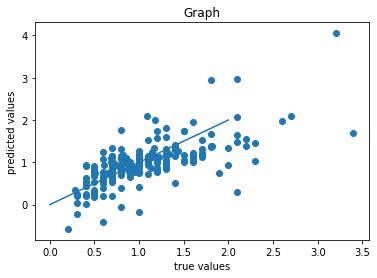

In [0]:
# Insert your code to plot true vs predicted test values
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.plot([0,1,2],[0,1,2])
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('Graph')
plt.show()


You have implemented simple linear regression. You may apply regularization techniques that constrain the coefficients. We will be seeing 2 types of regularized regression techniques:


1.   Ridge Regression
2.   Lasso Regression



# Ridge Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.



---
**5 Points** 


---




**alpha**: It is the Regularization strength; must be a positive float.egularization improves the conditioning of the problem and reduces the variance of the estimates

**fit_intercept** : Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations

**normalize**:This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm

**copy_X** : If True, X will be copied; else, it may be overwritten.

**random_state**: The seed of the pseudo random number generator to use when shuffling the data. 






In ridge regression, L-2 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and comment on the model performance. You may use the best setting of Linear Regression to Ridge Regression also. **Comment** on the effect of the alpha value on the mean squared error.


---

**9 Points**


---



***Comments***

By increasing the value of alpha we observe that mean square error decreases at first and then increases. Thereotically mse should increase by increasing alpha value as we are penalizing more on attributes which leads to simpler model and thus increasing the bias and reducing the variance.

0.17461685905799754
0.16398330565433183
0.15892044042433054
0.15641482317940794
0.1593772996236714
0.1632179999674756
0.16692102691669675
0.1703879524045154
0.17363662005344338
0.17669900580642034
0.1796038618398409


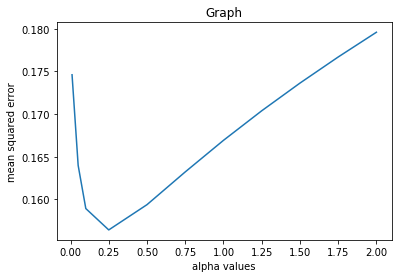

In [0]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below
x_train,x_test,y_train,y_test=train_test_split(input_features,target,test_size = 0.2,random_state=0)

for alpha_ in alpha_values:


    # Step 2: Create a Ridge regressor object with desired alpha value
    # Insert your code below
    rid_obj=Ridge(fit_intercept=False)
    rid_obj.set_params(alpha=alpha_)

    # Step 3(a): Train the Ridge Regression model using training set
    # Insert your code below
    rid_obj.fit(x_train,y_train)

    # Step 3(b): Predict the target values using the trained Ridge model for test set instances
    # Insert your code below
    pred=rid_obj.predict(x_test)


    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    print(mean_squared_error(y_test,pred))
    error_list.append(mean_squared_error(y_test,pred))


# Step 4: Plot a graph of different alpha values of ridge regression versus mean squared error
plt.plot(alpha_values,error_list)
plt.xlabel('alpha values')
plt.ylabel('mean squared error')
plt.title('Graph')
plt.show()



# Lasso Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.



---
**5 Points** 


---




***Parameters***

**alpha :float,optional **: Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object.

**fit_intercept: boolean, optional, default True**
Whether to calculate the intercept for this model.


**max_iter**:The maximum number of iterations

**positive**: When set to True, forces the coefficients to be positive.

**precompute**: Whether to use a precomputed Gram matrix to speed up calculations.



***Attributes***

**coef_:** Parameter vector (w in the cost function formula)

In Lasso regression, L-1 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and **comment** on the model performance. You may use the best setting of Linear Regression to Lasso Regression also.

---

**9 Points**

---



***Comments***

The graphs shows that increasing the value of alpha increases the mean square error.Also, the error obtained in Lasso is more than compared to error in Ridge regression. 

0.36516872495263747
0.5458372449552266
0.5778196179909838
0.6462641766709415
0.7554060728630274
0.8867094564063571
0.9616922416399727
0.9798824933216704
0.9997080663385793
1.0211689781706657
1.0442652208170433


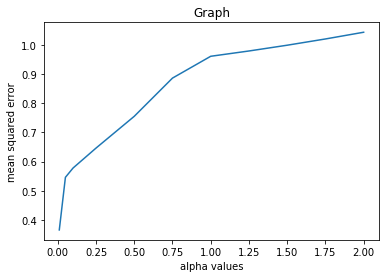

In [0]:
from sklearn import linear_model
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below
x_train,x_test,y_train,y_test=train_test_split(input_features,target,test_size = 0.2,random_state=0)
for alpha_ in alpha_values:

    # Step 2: Create a LASSO regressor object with desired alpha value
    # Insert your code below
    lasso= Lasso(max_iter=10000,fit_intercept=False)
    lasso.set_params(alpha=alpha_)


    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below
    lasso.fit(x_train,y_train)

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    pred=lasso.predict(x_test)

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    print(mean_squared_error(y_test,pred))
    error_list.append(mean_squared_error(y_test,pred))


# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error
plt.plot(alpha_values,error_list)
plt.xlabel('alpha values')
plt.ylabel('mean squared error')
plt.title('Graph')
plt.show()



Now since you have tried LASSO with different alpha values, you may try different number of maximum iterations associated with LASSO and **comment** on its effect on the mean squared error.


---

**9 Points**

---



***Comments***

We observed that after certain number of maximum iterations the mean squared error becomes constant.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.22245726898029, tolerance: 0.1090122131610264
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8535327677055875, tolerance: 0.1090122131610264
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21031091494353404, tolerance: 0.1090122131610264
  positive)


[0.7992670045789219, 0.9573507163543515, 0.9614369349381671, 0.9616930666297626, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727, 0.9616922416399727,

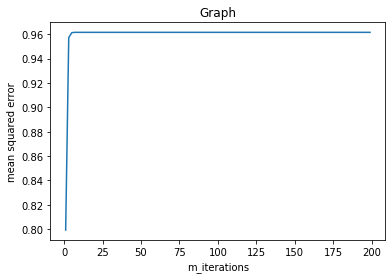

In [0]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Step 1: Split into train and test set based on the best fraction
# Insert your code below
x_train,x_test,y_train,y_test=train_test_split(input_features,target,test_size = 0.2,random_state=0)
error_list= []
iteration_list= []
for m_iterations in range(1,200,2):

    

    # Step 2: Create a LASSO regressor object with desired number of iterations
    # Insert your code below
    lasso2=Lasso(max_iter=m_iterations,fit_intercept=False)
    iteration_list.append(m_iterations)

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below
    lasso2.fit(x_train,y_train)

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    y_pred=lasso2.predict(x_test)

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    l=(mean_squared_error(y_test,y_pred))
    error_list.append(mean_squared_error(y_test,y_pred))

# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error
print(error_list)
plt.plot(iteration_list,error_list)
plt.xlabel('m_iterations')
plt.ylabel('mean squared error')
plt.title('Graph')
plt.show()

